In [308]:
# Rumet Solmaz 110180246
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [309]:
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)
df.head(10)

,EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ,MAG_AVG_B-VECTOR_nT,BX__GSE_nT,BY__GSM_nT,BZ__GSM_nT,FLOW_SPEED__GSE_km/s,PROTON_DENSITY_n/cc,TEMPERATURE_K,FLOW_PRESSURE_nPa
0,2015-05-18T00:00:00.000Z,7.05,1.17,3.77,5.76,378.1,5.85,94634.0,1.67
1,2015-05-18T00:01:00.000Z,6.74,0.54,1.52,6.26,378.9,5.75,105629.0,1.65
2,2015-05-18T00:02:00.000Z,6.82,-0.05,1.53,6.55,379.2,5.38,131522.0,1.55
3,2015-05-18T00:03:00.000Z,6.99,-0.02,2.43,6.52,377.4,4.93,119074.0,1.40
4,2015-05-18T00:04:00.000Z,6.89,-0.18,1.94,6.57,378.5,4.95,110464.0,1.42
5,2015-05-18T00:05:00.000Z,6.99,0.42,2.08,6.56,379.0,5.41,141666.0,1.55
6,2015-05-18T00:06:00.000Z,7.09,0.73,2.42,6.48,379.0,5.41,141666.0,1.55
7,2015-05-18T00:07:00.000Z,7.22,1.70,2.84,6.28,385.8,5.30,109935.0,1.58
8,2015-05-18T00:08:00.000Z,6.56,1.04,2.13,6.03,385.1,5.30,104373.0,1.57
9,2015-05-18T00:09:00.000Z,6.34,1.04,2.93,5.53,383.6,5.30,100958.0,1.56


In [310]:
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [311]:
kelvin_to_ev = 1 / 11600
df['Temperature_eV'] = df['TEMPERATURE_K'] * kelvin_to_ev

In [312]:
df['EPOCH_TIME'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

In [313]:
df.set_index('EPOCH_TIME', inplace=True)

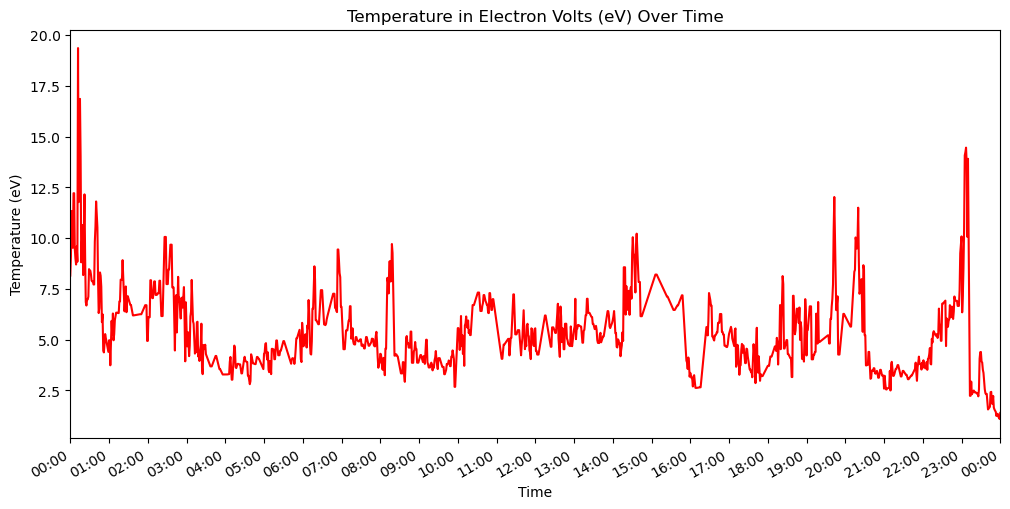

In [314]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature_eV'], linestyle='-', color='red')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlim(df.index.min(), df.index.max())
plt.gcf().autofmt_xdate()
plt.title('Temperature in Electron Volts (eV) Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (eV)')
plt.show()

In [315]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]


In [316]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
df['PROTON_DENSITY_n/cc'] *= 1e6  
df['FLOW_SPEED__GSE_km/s'] *= km_to_m

In [317]:
df['Pdyn'] = mp * df['PROTON_DENSITY_n/cc'] * df['FLOW_SPEED__GSE_km/s']**2 
df['Pmag'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2) / (2 * mu_0)  
df['Pgas'] = 2 * df['PROTON_DENSITY_n/cc'] * k * df['TEMPERATURE_K']  

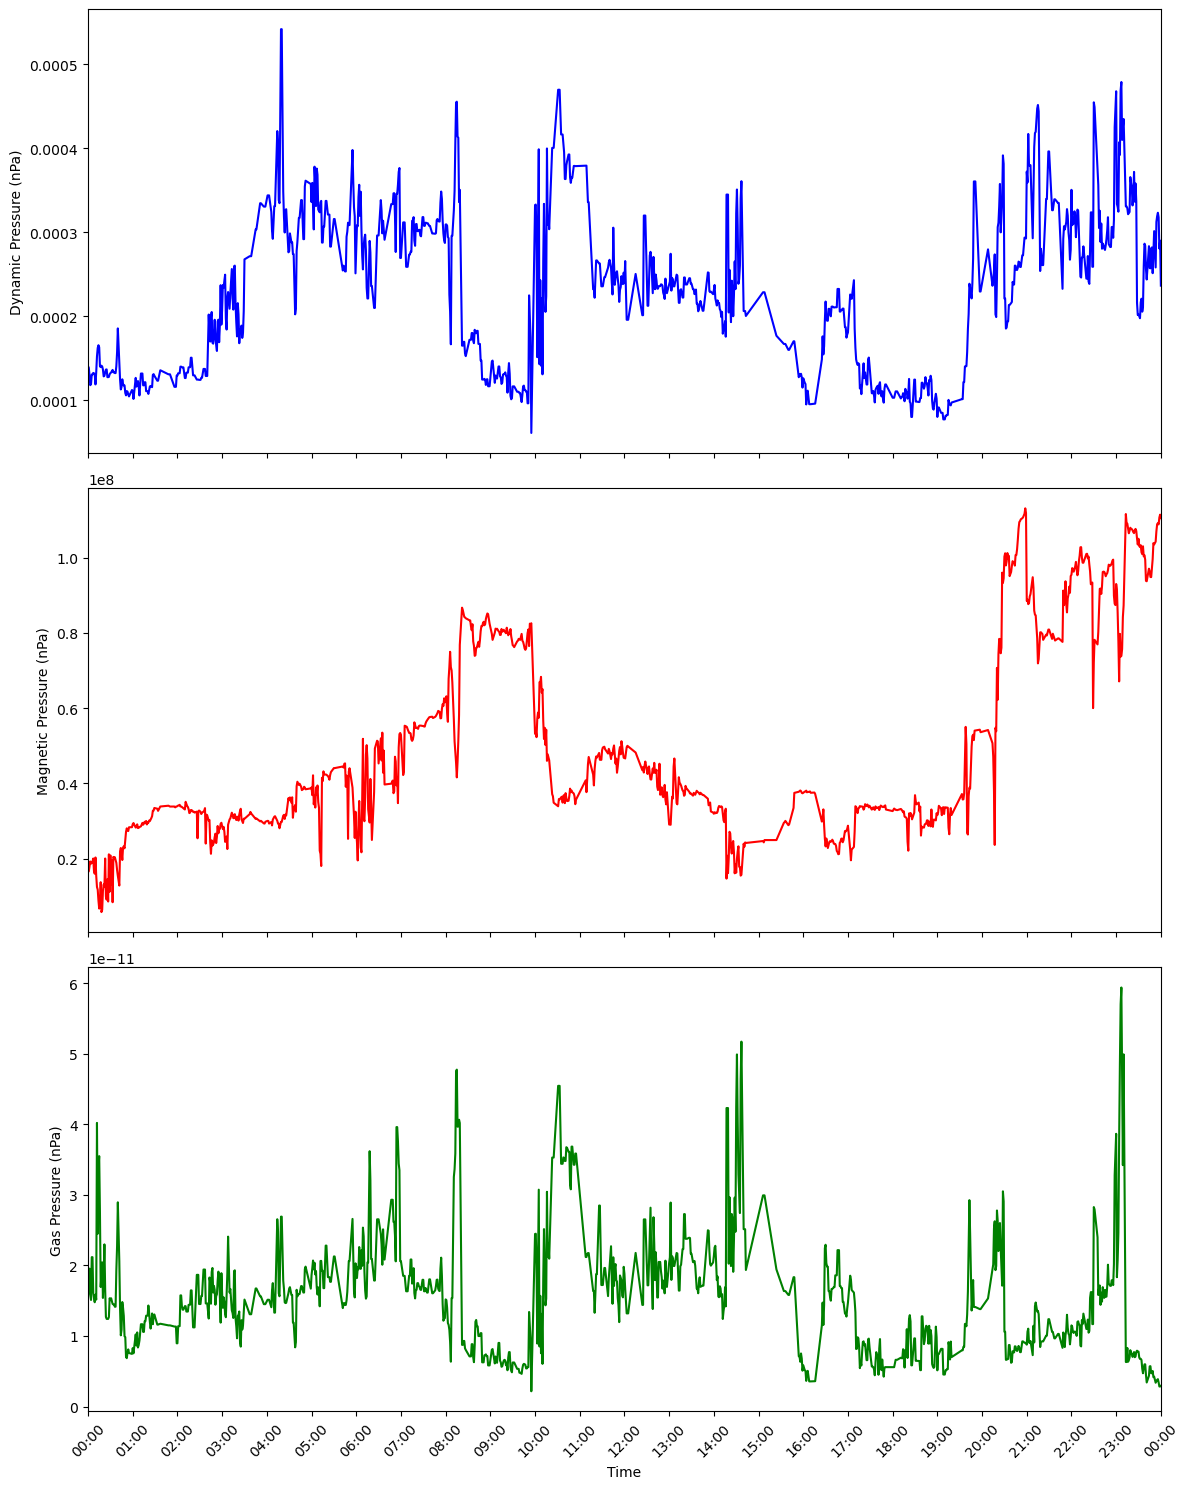

In [318]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
axes[0].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pdyn'], color='b', label='Dynamic Pressure')
axes[0].set_ylabel('Dynamic Pressure (nPa)')
axes[1].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pmag'], color='r', label='Magnetic Pressure')
axes[1].set_ylabel('Magnetic Pressure (nPa)')
axes[2].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pgas'], color='g', label='Gas Pressure')
axes[2].set_ylabel('Gas Pressure (nPa)')
for ax in axes:
    ax.set_xlim(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].iloc[0], df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].iloc[-1])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [319]:
amu_to_kg = 1.66053906660e-27 
km_to_m = 1000  
mu_0 = 4 * 3.14159265359e-7 
k = 1.380649e-23 
mp = 1.68e-22
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)

In [320]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [321]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

In [322]:
df['PROTON_DENSITY_n/cc'] *=

In [323]:
df['FLOW_SPEED__GSE_km/s'] *= km_to_m

In [324]:
df['Pdyn'] = mp * df['PROTON_DENSITY_n/cc'] * df['FLOW_SPEED__GSE_km/s']**2 
df['Pmag'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2) / (2 * mu_0)  
df['Pgas'] = 2 * df['PROTON_DENSITY_n/cc'] * k * df['TEMPERATURE_K']  

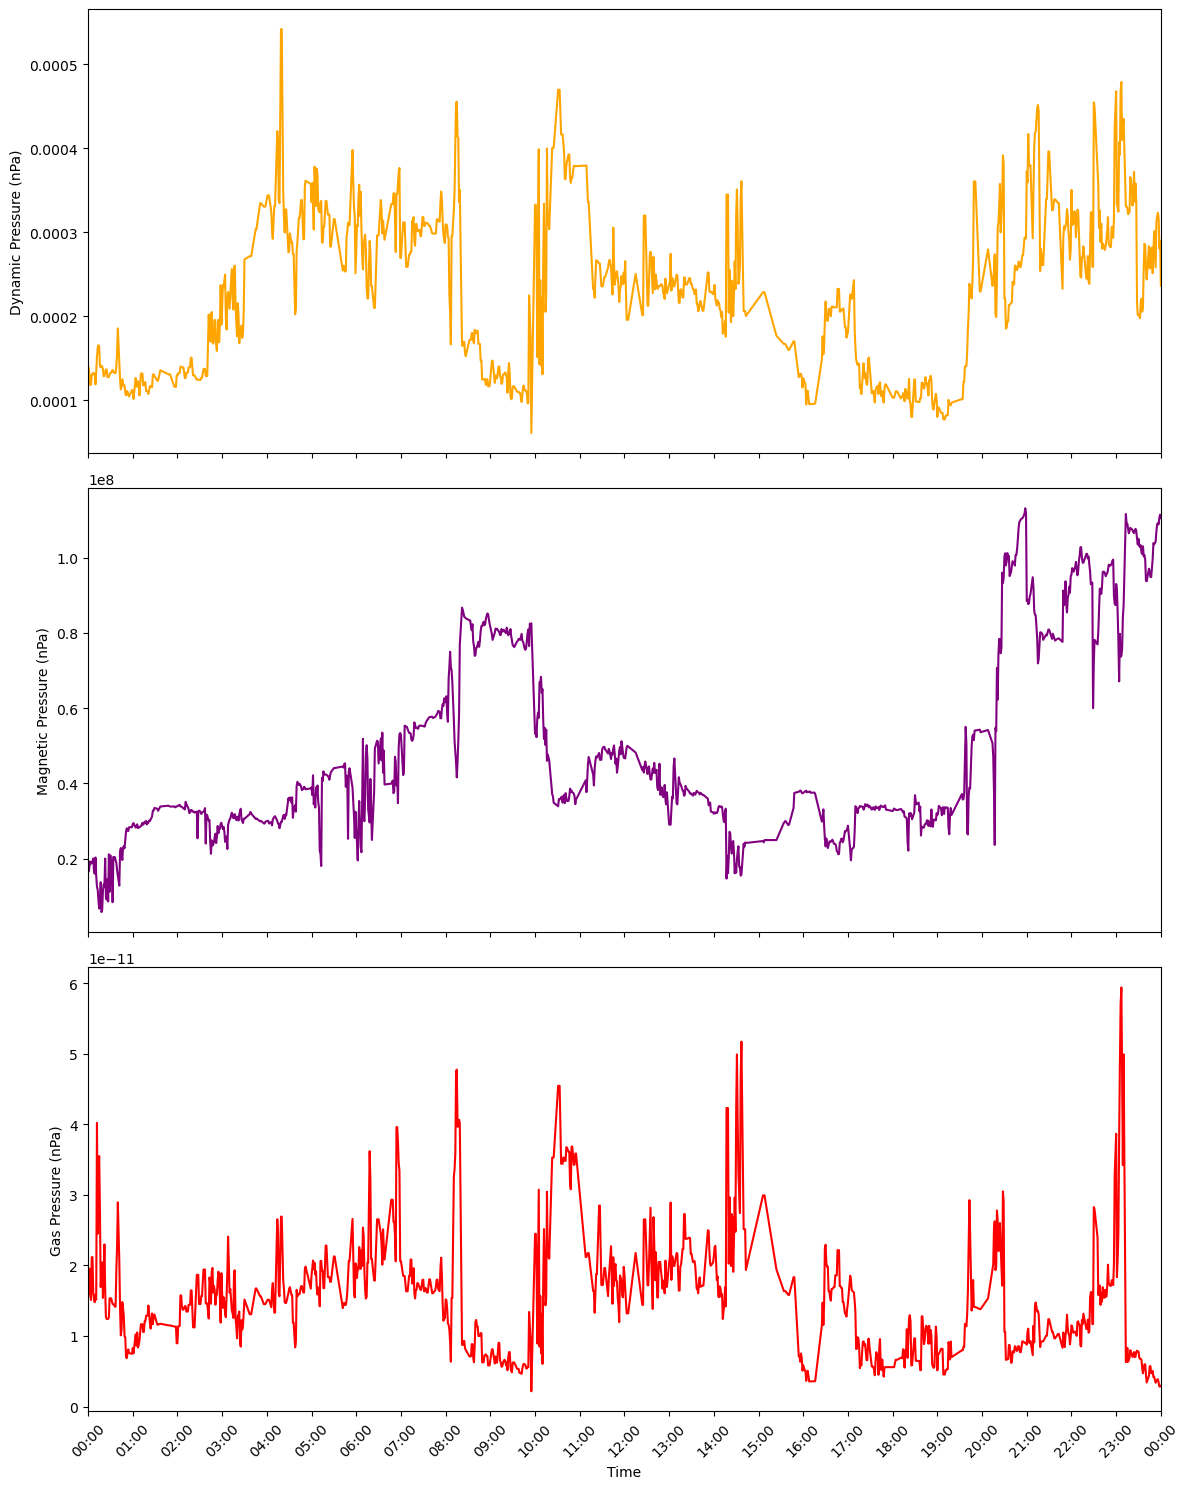

In [325]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
axes[0].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pdyn'], color='orange', label='Dynamic Pressure')
axes[0].set_ylabel('Dynamic Pressure (nPa)')
axes[1].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pmag'], color='purple', label='Magnetic Pressure')
axes[1].set_ylabel('Magnetic Pressure (nPa)')
axes[2].plot(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], df['Pgas'], color='red', label='Gas Pressure')
axes[2].set_ylabel('Gas Pressure (nPa)')
for ax in axes:
    ax.set_xlim(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].iloc[0], df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].iloc[-1])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [326]:
distances_au = {'Venus': 0.7, 'Earth': 1.0,  'Mars': 1.5, 'Jupiter': 5.0}

In [327]:
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)

In [328]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [329]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

In [330]:
n_earth = df['PROTON_DENSITY_n/cc'].mean()
v_earth = df['FLOW_SPEED__GSE_km/s'].mean()
B_earth = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2).mean()**0.5
Pdyn_earth = (n_earth * v_earth**2) / (2 * 1e-9)  

In [331]:
planet_properties = {}
for planet, distance in distances_au.items():
    n_planet = n_earth * (1 / distance)**2
    v_planet = v_earth  
    B_planet = B_earth * (1 / distance)**2
    Pdyn_planet = Pdyn_earth * (1 / distance)**2
    
    planet_properties[planet] = {
        'Density (#/cc)': n_planet,
        'Flow Speed (km/s)': v_planet,
        'Magnetic Field (nT)': B_planet,
        'Dynamic Pressure (nPa)': Pdyn_planet
    }

In [332]:
for planet, properties in planet_properties.items():
    print(f"{planet}:")
    for prop, value in properties.items():
        print(f"  {prop}: {value:.2e}")

Venus:
  Density (#/cc): 1.83e+01
  Flow Speed (km/s): 3.88e+02
  Magnetic Field (nT): 2.28e+01
  Dynamic Pressure (nPa): 1.38e+15
Earth:
  Density (#/cc): 8.95e+00
  Flow Speed (km/s): 3.88e+02
  Magnetic Field (nT): 1.12e+01
  Dynamic Pressure (nPa): 6.75e+14
Mars:
  Density (#/cc): 3.98e+00
  Flow Speed (km/s): 3.88e+02
  Magnetic Field (nT): 4.96e+00
  Dynamic Pressure (nPa): 3.00e+14
Jupiter:
  Density (#/cc): 3.58e-01
  Flow Speed (km/s): 3.88e+02
  Magnetic Field (nT): 4.46e-01
  Dynamic Pressure (nPa): 2.70e+13


In [333]:
amu_to_kg = 1.66053906660e-27  
km_to_m = 1000  
mu_0 = 4 * np.pi * 1e-7  
k = 1.380649e-23  
mp = 1.68e-22
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [334]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [335]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])


In [336]:
n_earth = df['PROTON_DENSITY_n/cc'].mean()
v_earth = df['FLOW_SPEED__GSE_km/s'].mean()
T_earth = df['TEMPERATURE_K'].mean()
B_earth = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2).mean()**0.5
Bz_earth = df['BZ__GSM_nT'].mean()
Pdyn_earth = mp * n_earth * v_earth**2 * 1e9 
Pmag_earth = B_earth**2 / (2 * mu_0 * 1e-9)  
Pgas_earth = 2 * n_earth * k * T_earth * 1e9  

In [337]:
distances_au = {
    'Venus': 0.7,
    'Earth': 1.0,
    'Mars': 1.5,
    'Jupiter': 5.0
}


In [338]:
columns = [
    'IMF Btot (nT)', 'Southward IMF Bz (nT)', 'Density (#/cm3)', 
    'Speed (km/sec)', 'Temperature (Kelvin)', 'Pdyn (nPa)', 
    'Pmag (nPa)', 'Pgas (nPa)'
]
table = pd.DataFrame(index=distances_au.keys(), columns=columns)

for planet, distance in distances_au.items():
    n_planet = n_earth * (1 / distance)**2
    v_planet = v_earth 
    T_planet = T_earth * (1 / distance) 
    B_planet = B_earth * (1 / distance)**2
    Bz_planet = Bz_earth * (1 / distance)**2
    Pdyn_planet = Pdyn_earth * (1 / distance)**2
    Pmag_planet = Pmag_earth * (1 / distance)**4  
    Pgas_planet = Pgas_earth * (1 / distance)**2

    table.loc[planet] = [
        B_planet, Bz_planet, n_planet, 
        v_planet, T_planet, Pdyn_planet, 
        Pmag_planet, Pgas_planet
    ]
table = table.applymap(lambda x: f"{x:.2e}")
print(table)

        IMF Btot (nT) Southward IMF Bz (nT) Density (#/cm3) Speed (km/sec)  \
Venus        2.28e+01              6.60e+00        1.83e+01       3.88e+02   
Earth        1.12e+01              3.23e+00        8.95e+00       3.88e+02   
Mars         4.96e+00              1.44e+00        3.98e+00       3.88e+02   
Jupiter      4.46e-01              1.29e-01        3.58e-01       3.88e+02   

        Temperature (Kelvin) Pdyn (nPa) Pmag (nPa) Pgas (nPa)  
Venus               8.96e+04   4.63e-07   2.06e+17   3.17e-08  
Earth               6.27e+04   2.27e-07   4.95e+16   1.55e-08  
Mars                4.18e+04   1.01e-07   9.78e+15   6.89e-09  
Jupiter             1.25e+04   9.07e-09   7.92e+13   6.20e-10  


In [339]:
km_to_m = 1000  
amu_to_kg = 1.66053906660e-27  
k = 1.380649e-23 
mu_0 = 4 * np.pi * 1e-7 
eV_to_K = 11600 

file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)

In [340]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [341]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

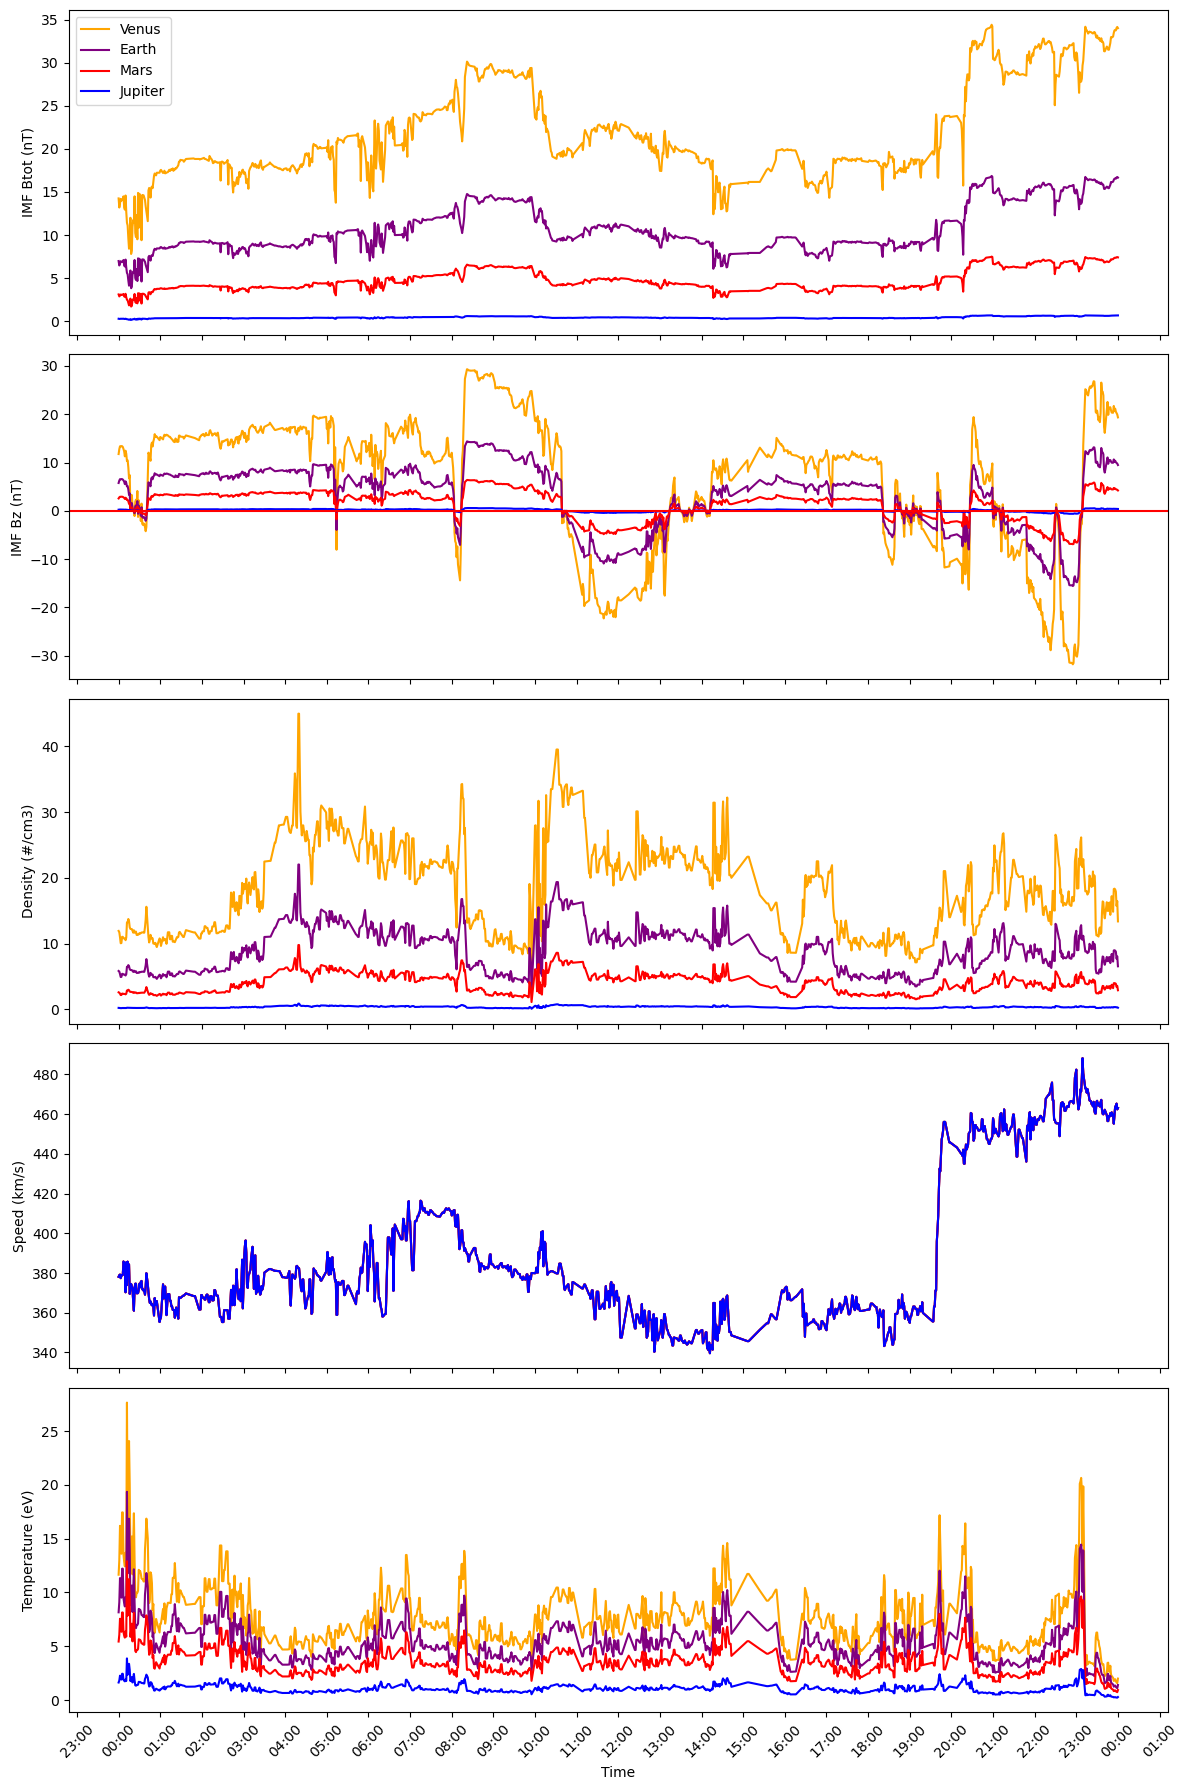

In [342]:
distances_au = {
    'Venus': 0.7,
    'Earth': 1.0,
    'Mars': 1.5,
    'Jupiter': 5.0
}
colors = {
    'Venus': 'orange',
    'Earth': 'purple',
    'Mars': 'red',
    'Jupiter': 'blue'
}
def rescale_data(df, distance):
    rescaled_df = df.copy()
    rescaled_df['PROTON_DENSITY_n/cc'] *= (1 / distance)**2
    rescaled_df['TEMPERATURE_K'] *= (1 / distance)
    rescaled_df['IMF_Btot'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2)**0.5 * (1 / distance)**2
    rescaled_df['IMF_Bz'] = df['BZ__GSM_nT'] * (1 / distance)**2
    rescaled_df['Temperature_eV'] = rescaled_df['TEMPERATURE_K'] / eV_to_K
    return rescaled_df

fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
for planet, distance in distances_au.items():
    planet_df = rescale_data(df, distance)
    color = colors[planet]
    axes[0].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['IMF_Btot'], color=color, label=f'{planet}')
    axes[1].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['IMF_Bz'], color=color)
    axes[2].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['PROTON_DENSITY_n/cc'], color=color)
    axes[3].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['FLOW_SPEED__GSE_km/s'], color=color)
    axes[4].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Temperature_eV'], color=color)
axes[0].set_ylabel('IMF Btot (nT)')
axes[0].legend()
axes[1].set_ylabel('IMF Bz (nT)')
axes[1].axhline(0, color='red', linestyle='-')  

axes[2].set_ylabel('Density (#/cm3)')

axes[3].set_ylabel('Speed (km/s)')

axes[4].set_ylabel('Temperature (eV)')
for ax in axes:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [343]:
km_to_m = 1000  
amu_to_kg = 1.66053906660e-27  
k = 1.380649e-23  
mu_0 = 4 * np.pi * 1e-7  
eV_to_K = 11600  
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [344]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [345]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

In [346]:
distances_au = {
    'Venus': 0.7,
    'Earth': 1.0,
    'Mars': 1.5,
    'Jupiter': 5.0
}
colors = {
    'Venus': 'orange',
    'Earth': 'purple',
    'Mars': 'red',
    'Jupiter': 'blue'
}

In [347]:
def rescale_data(df, distance):
    rescaled_df = df.copy()
    rescaled_df['PROTON_DENSITY_n/cc'] *= (1 / distance)**2
    rescaled_df['TEMPERATURE_K'] *= (1 / distance)
    rescaled_df['IMF_Btot'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2)**0.5 * (1 / distance)**2
    rescaled_df['IMF_Bz'] = df['BZ__GSM_nT'] * (1 / distance)**2
    rescaled_df['Temperature_eV'] = rescaled_df['TEMPERATURE_K'] / eV_to_K
    return rescaled_df


min_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].min()
max_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].max()


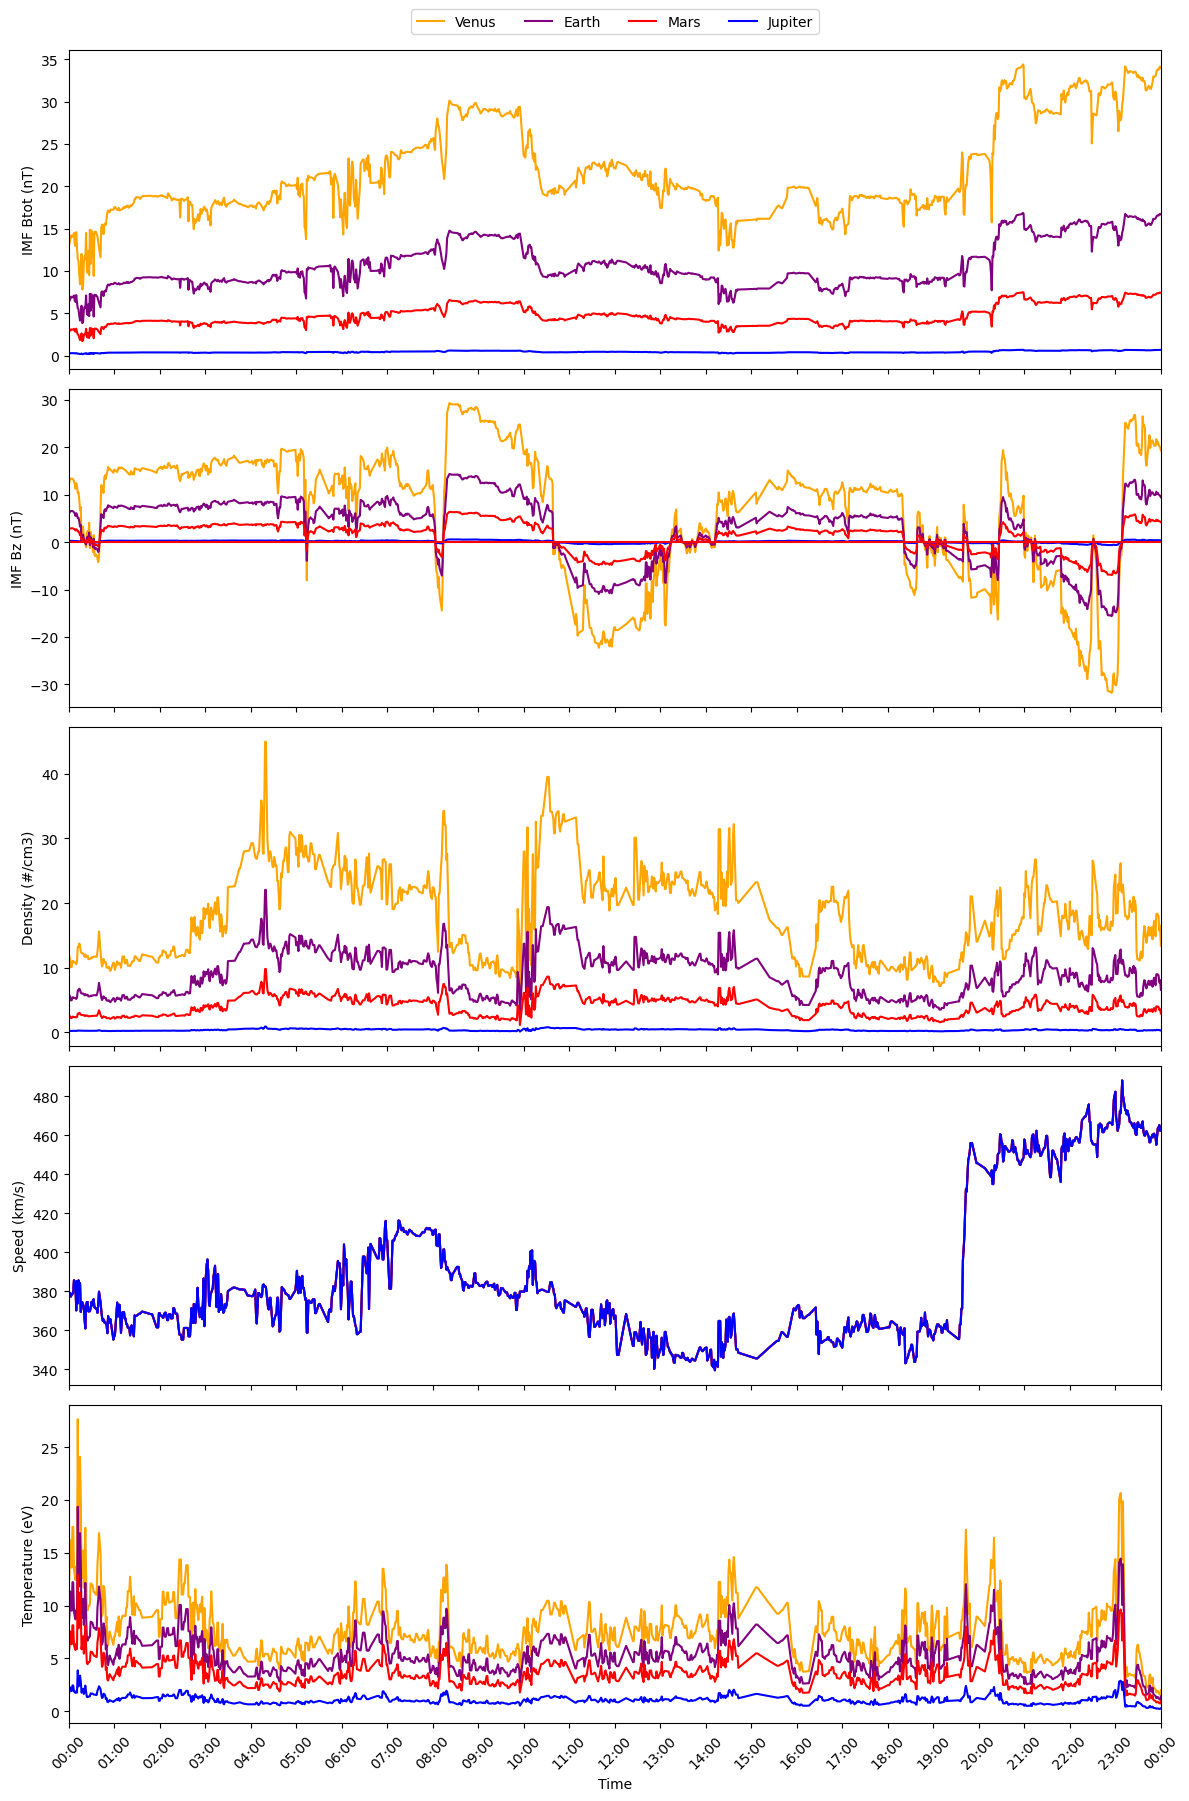

In [348]:
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
for planet, distance in distances_au.items():
    planet_df = rescale_data(df, distance)
    color = colors[planet]
    axes[0].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['IMF_Btot'], color=color, label=f'{planet}')
    axes[1].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['IMF_Bz'], color=color, label=f'{planet}')
    axes[2].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['PROTON_DENSITY_n/cc'], color=color, label=f'{planet}')
    axes[3].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['FLOW_SPEED__GSE_km/s'], color=color, label=f'{planet}')
    axes[4].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Temperature_eV'], color=color, label=f'{planet}')
axes[0].set_ylabel('IMF Btot (nT)')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)  
axes[1].set_ylabel('IMF Bz (nT)')
axes[1].axhline(0, color='red', linestyle='-')  

axes[2].set_ylabel('Density (#/cm3)')

axes[3].set_ylabel('Speed (km/s)')

axes[4].set_ylabel('Temperature (eV)')
for ax in axes:
    ax.set_xlim([min_time, max_time])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [349]:
km_to_m = 1000  
amu_to_kg = 1.66053906660e-27  
k = 1.380649e-23  
mu_0 = 4 * np.pi * 1e-7  
eV_to_K = 11600  
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [350]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

In [351]:
df['Pdyn'] = 1.6726219e-6 * df['PROTON_DENSITY_n/cc'] * (df['FLOW_SPEED__GSE_km/s'])**2
df['Pmag'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2) / (2 * mu_0 * 1e9)
df['Pgas'] = df['PROTON_DENSITY_n/cc'] * k * df['TEMPERATURE_K'] * 1e6

In [352]:
distances_au = {
    'Venus': 0.7,
    'Earth': 1.0,
    'Mars': 1.5,
    'Jupiter': 5.0
}
colors = {
    'Venus': 'orange',
    'Earth': 'purple',
    'Mars': 'red',
    'Jupiter': 'blue'
}

In [353]:
def rescale_data(df, distance):
    rescaled_df = df.copy()
    rescaled_df['Pdyn'] *= (1 / distance)**2
    rescaled_df['Pmag'] *= (1 / distance)**2
    rescaled_df['Pgas'] *= (1 / distance)
    return rescaled_df

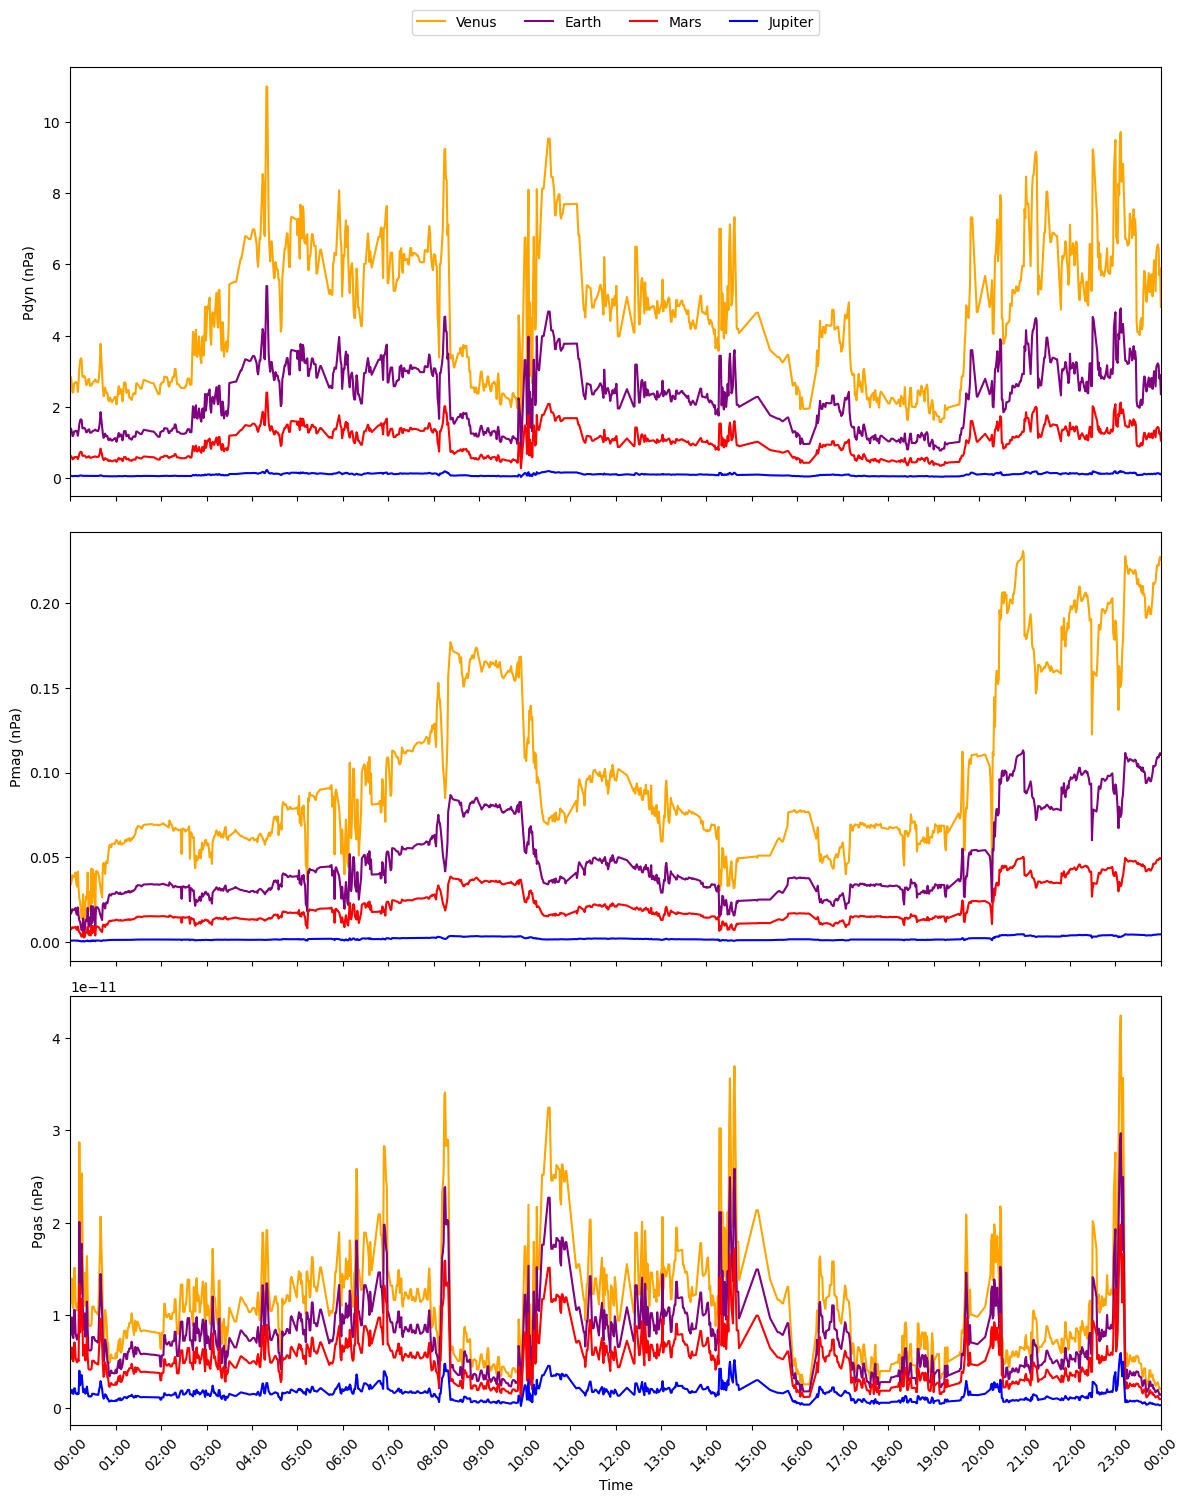

In [354]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
min_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].min()
max_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].max()
for planet, distance in distances_au.items():
    planet_df = rescale_data(df, distance)
    color = colors[planet]
    axes[0].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pdyn'], color=color, label=f'{planet}')
    axes[1].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pmag'], color=color, label=f'{planet}')
    axes[2].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pgas'], color=color, label=f'{planet}')
axes[0].set_ylabel('Pdyn (nPa)')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

axes[1].set_ylabel('Pmag (nPa)')

axes[2].set_ylabel('Pgas (nPa)')
for ax in axes:
    ax.set_xlim([min_time, max_time])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [355]:
km_to_m = 1000 
amu_to_kg = 1.66053906660e-27  
k = 1.380649e-23  
mu_0 = 4 * np.pi * 1e-7  
eV_to_K = 11600 
file_path = 'C:/Users/lenovo/Desktop/aa.csv'
df = pd.read_csv(file_path)

In [356]:
df = df[df['FLOW_SPEED__GSE_km/s'] != 99999.9]
df = df[df['PROTON_DENSITY_n/cc'] != 999.990]
df = df[df['FLOW_SPEED__GSE_km/s'] != 99.9900]
df = df[df['BX__GSE_nT'] != 9999.99]
df = df[df['BY__GSM_nT'] != 9999.99]
df = df[df['BZ__GSM_nT'] != 9999.99]
df = df[df['TEMPERATURE_K'] != 1.00000e+07]

In [357]:
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df['Pdyn'] = 1.6726219e-6 * df['PROTON_DENSITY_n/cc'] * (df['FLOW_SPEED__GSE_km/s'])**2
df['Pmag'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2) / (2 * mu_0 * 1e18)  
df['Pgas'] = df['PROTON_DENSITY_n/cc'] * k * df['TEMPERATURE_K'] * 1e6 
df['TEMPERATURE_eV'] = df['TEMPERATURE_K'] / eV_to_K

In [358]:
distances_au = {
    'Venus': 0.7,
    'Earth': 1.0,
    'Mars': 1.5,
    'Jupiter': 5.0
}
colors = {
    'Venus': 'orange',
    'Earth': 'purple',
    'Mars': 'red',
    'Jupiter': 'blue'
}

In [359]:
def rescale_data(df, distance):
    rescaled_df = df.copy()
    rescaled_df['PROTON_DENSITY_n/cc'] *= (1 / distance)**2
    rescaled_df['TEMPERATURE_K'] *= (1 / distance)
    rescaled_df['IMF_Btot'] = (df['BX__GSE_nT']**2 + df['BY__GSM_nT']**2 + df['BZ__GSM_nT']**2)**0.5 * (1 / distance)**2
    rescaled_df['IMF_Bz'] = df['BZ__GSM_nT'] * (1 / distance)**2
    rescaled_df['Temperature_eV'] = rescaled_df['TEMPERATURE_K'] / eV_to_K
    rescaled_df['Pdyn'] *= (1 / distance)**2
    rescaled_df['Pmag'] *= (1 / distance)**4
    rescaled_df['Pgas'] *= (1 / distance)
    return rescaled_df

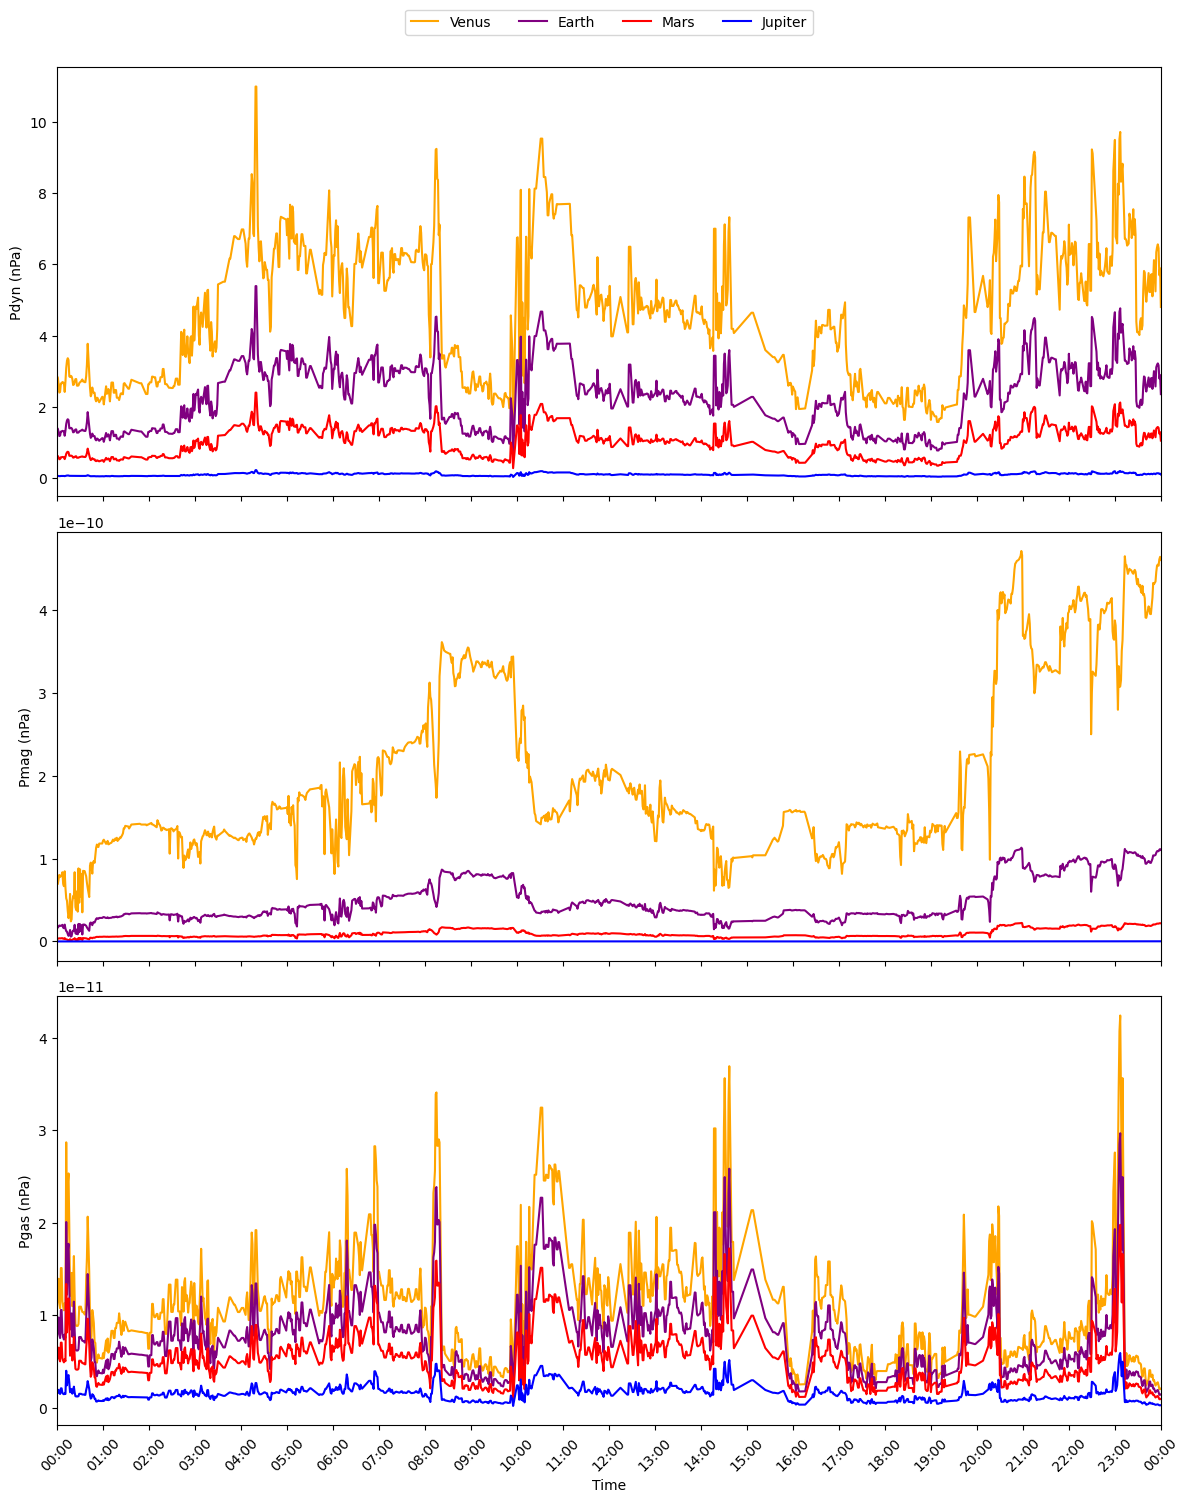

                Property         Venus         Earth          Mars  \
0          IMF Btot (nT)  2.201913e+01  1.078938e+01  4.795278e+00   
1  Southward IMF Bz (nT)  6.601615e+00  3.234791e+00  1.437685e+00   
2        Density (#/cm3)  1.826829e+01  8.951461e+00  3.978427e+00   
3         Speed (km/sec)  3.883599e+02  3.883599e+02  3.883599e+02   
4   Temperature (Kelvin)  8.963887e+04  6.274721e+04  4.183147e+04   
5             Pdyn (nPa)  4.656336e+00  2.281605e+00  1.014047e+00   
6             Pmag (nPa)  2.062104e-10  4.951112e-11  9.779974e-12   
7             Pgas (nPa)  1.114083e-11  7.798579e-12  5.199053e-12   

        Jupiter  
0  4.315750e-01  
1  1.293917e-01  
2  3.580584e-01  
3  3.883599e+02  
4  1.254944e+04  
5  9.126419e-02  
6  7.921779e-14  
7  1.559716e-12  


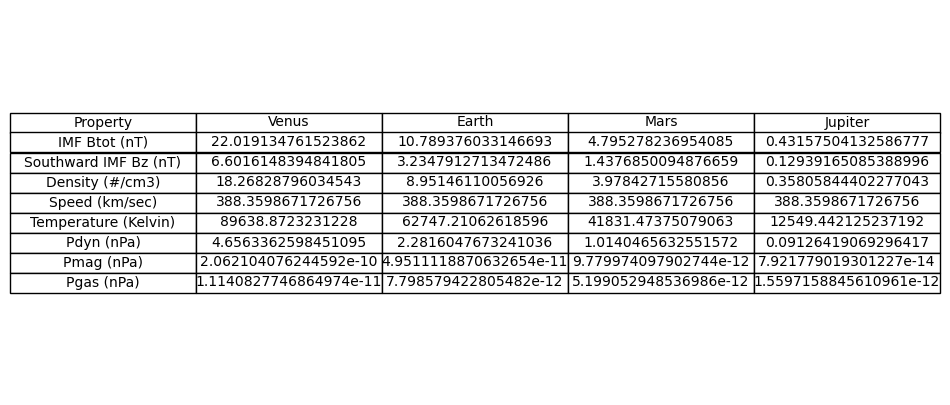

In [360]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
min_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].min()
max_time = df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'].max()
for planet, distance in distances_au.items():
    planet_df = rescale_data(df, distance)
    color = colors[planet]
    axes[0].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pdyn'], color=color, label=f'{planet}')
    axes[1].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pmag'], color=color, label=f'{planet}')
    axes[2].plot(planet_df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'], planet_df['Pgas'], color=color, label=f'{planet}')
axes[0].set_ylabel('Pdyn (nPa)')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)  
axes[1].set_ylabel('Pmag (nPa)')

axes[2].set_ylabel('Pgas (nPa)')
for ax in axes:
    ax.set_xlim([min_time, max_time])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Time')
plt.tight_layout()
plt.show()
def calculate_averages(df, distance):
    rescaled_df = rescale_data(df, distance)
    averages = {
        'IMF Btot (nT)': rescaled_df['IMF_Btot'].mean(),
        'Southward IMF Bz (nT)': rescaled_df['IMF_Bz'].mean(),
        'Density (#/cm3)': rescaled_df['PROTON_DENSITY_n/cc'].mean(),
        'Speed (km/sec)': rescaled_df['FLOW_SPEED__GSE_km/s'].mean(),
        'Temperature (Kelvin)': rescaled_df['TEMPERATURE_K'].mean(),
        'Pdyn (nPa)': rescaled_df['Pdyn'].mean(),
        'Pmag (nPa)': rescaled_df['Pmag'].mean(),
        'Pgas (nPa)': rescaled_df['Pgas'].mean()
    }
    return averages
averages = {planet: calculate_averages(df, distance) for planet, distance in distances_au.items()}

properties = {
    'Property': ['IMF Btot (nT)', 'Southward IMF Bz (nT)', 'Density (#/cm3)', 'Speed (km/sec)', 
                 'Temperature (Kelvin)', 'Pdyn (nPa)', 'Pmag (nPa)', 'Pgas (nPa)'],
    'Venus': [averages['Venus'][key] for key in averages['Venus']],
    'Earth': [averages['Earth'][key] for key in averages['Earth']],
    'Mars': [averages['Mars'][key] for key in averages['Mars']],
    'Jupiter': [averages['Jupiter'][key] for key in averages['Jupiter']]
}

properties_df = pd.DataFrame(properties)
print(properties_df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=properties_df.values, colLabels=properties_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.savefig('solar_wind_properties.png', bbox_inches='tight')
plt.show()


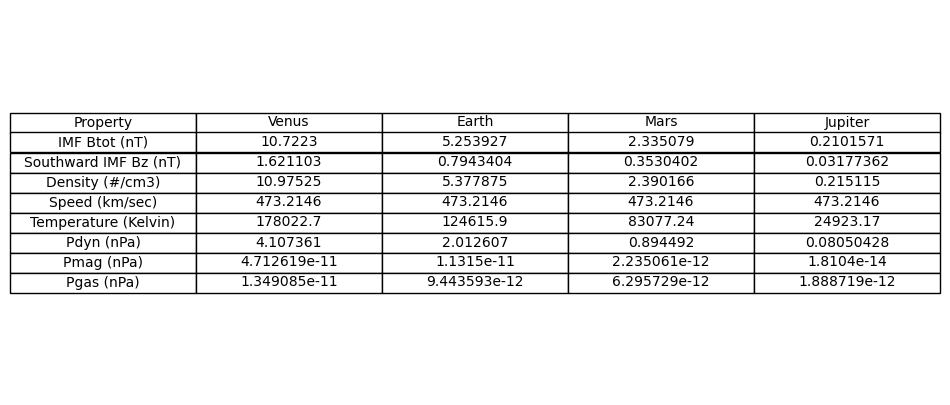

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Property': ['IMF Btot (nT)', 'Southward IMF Bz (nT)', 'Density (#/cm3)', 'Speed (km/sec)', 
                 'Temperature (Kelvin)', 'Pdyn (nPa)', 'Pmag (nPa)', 'Pgas (nPa)'],
    'Venus': [1.072230e+01, 1.621103e+00, 1.097525e+01, 4.732146e+02, 1.780227e+05, 4.107361e+00, 4.712619e-11, 1.349085e-11],
    'Earth': [5.253927e+00, 7.943404e-01, 5.377875e+00, 4.732146e+02, 1.246159e+05, 2.012607e+00, 1.131500e-11, 9.443593e-12],
    'Mars': [2.335079e+00, 3.530402e-01, 2.390166e+00, 4.732146e+02, 8.307724e+04, 8.944920e-01, 2.235061e-12, 6.295729e-12],
    'Jupiter': [2.101571e-01, 3.177362e-02, 2.151150e-01, 4.732146e+02, 2.492317e+04, 8.050428e-02, 1.810400e-14, 1.888719e-12]
}
df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.savefig('solar_wind_properties.png', bbox_inches='tight')
plt.show()
